# Coding Exercises (Part 3)

Now, you will have the opportunity to practice what you have learned. <br>
__Follow the instructions__ and insert your code! 

The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need some help or if you want to check your code, you can also have a look at the __solutions__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Exercise 2: User-defined functions

1. Create the user-defined function __present_value__ that calculates and returns the __present value of a single future payment__. (assume annual compounding freqeuncy, function should have three parameters). 

In [1]:
def pv(fv,rate,nper):
    pv=fv/(1+rate)**nper
    return pv

2. __Call the function__ present_value for a __1,000 USD__ payment that occurs in __10 years__. Assume an __interest rate of 5.0%__.

In [2]:
pv(1000,.05,10)

613.9132535407591

(result: 613.9132535407591)

3. Add the __fourth parameter m__ to the present_value function that allows to set __compounding frequency__ to __monthly/quarterly/semi-annual__. Define a __default argument for m__ in a way that present_value assumes __annual__ compounding frequency by default.  

In [7]:
def pv(fv,rate,nper,m=1):
    pv=fv/(1+rate/m)**(nper*m)
    return pv

4. __Call present_value__ with same inputs as in __Question 2__, but now assuming __monthly compounding frequency__.

In [8]:
pv(1000,0.05,10,12)

607.1610402990219

(result: 607.1610402990219)

5. (DIFFICULT!) Create the __function mortgage_loan__ that __calculates and returns__ a __2-dim numpy array__ with __1) total debt payments__, __2) interest component__, __3) amortization component__ and __4) outstanding loan balance__ for each and every period (incl. start). <br>
(As an example: the numpy array for a loan with a term of 48 months shall have 49 rows (for each period incl. start) and 4 columns) <br><br>

The function mortgage_loan shall have the __following parameters__:
- Initial Loan Amount / Balance -> __pv__
- Term (number of periods) -> __nper__
- stated annual interest rate -> __r__
- final Loan Balance at Maturity -> __fv__
- compounding frequency -> __m__ (default argument m = 12)

In [9]:
# run the cell
import numpy as np
import numpy_financial as npf # NEW!!!
np.set_printoptions(precision=2, suppress= True)

In [11]:
def mortgage_loan(pv, nper, r, fv, m = 12):
    
    array = np.empty((nper+1) * 4).reshape(nper+1, 4) #creating the empty array
    array[0,[0, 1, 2]] = 0 # initial payments (total, interest, amortization) at inception (t = 0) are 0
    total = npf.pmt(rate = r/m, nper = nper, pv = pv, fv = fv)
    array[1:, 0] = total
    array[1:, 1] = npf.ppmt(rate = r/m, per = range(1, nper + 1), nper = nper, pv = pv, fv = fv)
    array[1:, 2] = npf.ipmt(rate = r/m, per = range(1, nper + 1), nper = nper, pv = pv, fv = fv)
    array[:, 3] = -npf.fv(rate = r/m, nper = range(nper + 1), pmt = total, pv = pv)
    
    return array
    
    
    
    
    
    
    
    
    

6. __Call mortgage_loan__ for a loan with the following terms:   

- __800,000 USD__ Initial Balance
- 20 years -> __240 months__
- __4.25%__ stated annual interest rate
- final Loan Balance after 20 years: __0 USD__
- __monthly__ compounding frequency

In [14]:
mortgage_loan(800000,240,.0425,0,12)

array([[     0.  ,      0.  ,      0.  , 800000.  ],
       [ -4953.88,  -2120.54,  -2833.33, 797879.46],
       [ -4953.88,  -2128.05,  -2825.82, 795751.4 ],
       [ -4953.88,  -2135.59,  -2818.29, 793615.82],
       [ -4953.88,  -2143.15,  -2810.72, 791472.66],
       [ -4953.88,  -2150.74,  -2803.13, 789321.92],
       [ -4953.88,  -2158.36,  -2795.52, 787163.56],
       [ -4953.88,  -2166.  ,  -2787.87, 784997.55],
       [ -4953.88,  -2173.68,  -2780.2 , 782823.88],
       [ -4953.88,  -2181.37,  -2772.5 , 780642.5 ],
       [ -4953.88,  -2189.1 ,  -2764.78, 778453.4 ],
       [ -4953.88,  -2196.85,  -2757.02, 776256.55],
       [ -4953.88,  -2204.63,  -2749.24, 774051.92],
       [ -4953.88,  -2212.44,  -2741.43, 771839.47],
       [ -4953.88,  -2220.28,  -2733.6 , 769619.2 ],
       [ -4953.88,  -2228.14,  -2725.73, 767391.05],
       [ -4953.88,  -2236.03,  -2717.84, 765155.02],
       [ -4953.88,  -2243.95,  -2709.92, 762911.07],
       [ -4953.88,  -2251.9 ,  -2701.98, 76065

(the total debt payment per month is 4953.88)

7. __Visualize__ the remaining __Loan Balance__ over time.

In [19]:
# run the cell!
import matplotlib.pyplot as plt

In [17]:
balance = mortgage_loan(pv = 800000, nper = 240, r = 0.0425, fv = 0, m = 12)[:, -1]

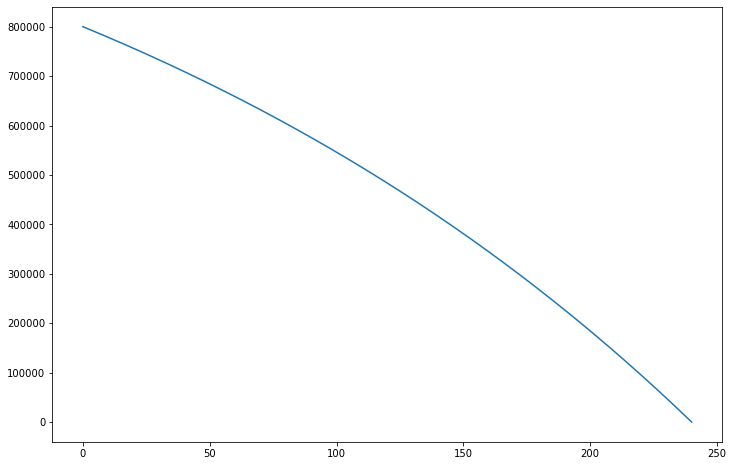

In [20]:
plt.figure(figsize = (12 , 8))
plt.plot(range(240+1), balance)
plt.show()

# Well Done!

---------------------------------------------------------------------------------------------------------------------

# Solutions (Stop here if you want to code on your own!)

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

1. Create the user-defined function __present_value__ that calculates and returns the __present value of a single future payment__. (assume annual compounding freqeuncy, function should have three parameters). 

In [ ]:
def present_value(fv, rate, nper):
    pv = fv / (1 + rate)**nper
    return pv

2. __Call the function__ present_value for a __1,000 USD__ payment that occurs in __10 years__. Assume an __interest rate of 5.0%__.

In [ ]:
present_value(fv = 1000, rate = 0.05, nper = 10)

(result: 613.9132535407591)

3. Add the __fourth parameter m__ to the present_value function that allows to set __compounding frequency__ to __monthly/quarterly/semi-annual__. Define a __default argument for m__ in a way that present_value assumes __annual__ compounding frequency by default.  

In [ ]:
def present_value(fv, rate, nper, m = 1):
    pv = fv / (1 + rate/m)**(nper*m)
    return pv

4. __Call present_value__ with same inputs as in __Question 2__, but now assuming __monthly compounding frequency__.

In [ ]:
present_value(fv = 1000, rate = 0.05, nper = 10, m = 12)

(result: 607.1610402990219)

5. (DIFFICULT!) Create the __function mortgage_loan__ that __calculates and returns__ a __2-dim numpy array__ with __1) total debt payments__, __2) interest component__, __3) amortization component__ and __4) outstanding loan balance__ for each and every period (incl. start). <br>
(As an example: the numpy array for a loan with a term of 48 months shall have 49 rows (for each period incl. start) and 4 columns) <br><br>

The function mortgage_loan shall have the __following parameters__:
- Initial Loan Amount / Balance -> __pv__
- Term (number of periods) -> __nper__
- stated annual interest rate -> __r__
- final Loan Balance at Maturity -> __fv__
- compounding frequency -> __m__ (default argument m = 12)

In [ ]:
# run the cell
import numpy as np
import numpy_financial as npf # NEW!!!
np.set_printoptions(precision=2, suppress= True)

In [15]:
def mortgage_loan(pv, nper, r, fv, m = 12):
    
    array = np.empty((nper+1) * 4).reshape(nper+1, 4) 
    array[0,[0, 1, 2]] = 0
    total = npf.pmt(rate = r/m, nper = nper, pv = pv, fv = fv)
    array[1:, 0] = total
    array[1:, 1] = npf.ppmt(rate = r/m, per = range(1, nper + 1), nper = nper, pv = pv, fv = fv)
    array[1:, 2] = npf.ipmt(rate = r/m, per = range(1, nper + 1), nper = nper, pv = pv, fv = fv)
    array[:, 3] = -npf.fv(rate = r/m, nper = range(nper + 1), pmt = total, pv = pv)
    
    return array

6. __Call mortgage_loan__ for a loan with the following terms:   

- __800,000 USD__ Initial Balance
- 20 years -> __240 months__
- __4.25%__ stated annual interest rate
- final Loan Balance after 20 years: __0 USD__
- __monthly__ compounding frequency

In [16]:
mortgage_loan(pv = 800000, nper = 240, r = 0.0425, fv = 0, m = 12)

array([[     0.  ,      0.  ,      0.  , 800000.  ],
       [ -4953.88,  -2120.54,  -2833.33, 797879.46],
       [ -4953.88,  -2128.05,  -2825.82, 795751.4 ],
       [ -4953.88,  -2135.59,  -2818.29, 793615.82],
       [ -4953.88,  -2143.15,  -2810.72, 791472.66],
       [ -4953.88,  -2150.74,  -2803.13, 789321.92],
       [ -4953.88,  -2158.36,  -2795.52, 787163.56],
       [ -4953.88,  -2166.  ,  -2787.87, 784997.55],
       [ -4953.88,  -2173.68,  -2780.2 , 782823.88],
       [ -4953.88,  -2181.37,  -2772.5 , 780642.5 ],
       [ -4953.88,  -2189.1 ,  -2764.78, 778453.4 ],
       [ -4953.88,  -2196.85,  -2757.02, 776256.55],
       [ -4953.88,  -2204.63,  -2749.24, 774051.92],
       [ -4953.88,  -2212.44,  -2741.43, 771839.47],
       [ -4953.88,  -2220.28,  -2733.6 , 769619.2 ],
       [ -4953.88,  -2228.14,  -2725.73, 767391.05],
       [ -4953.88,  -2236.03,  -2717.84, 765155.02],
       [ -4953.88,  -2243.95,  -2709.92, 762911.07],
       [ -4953.88,  -2251.9 ,  -2701.98, 76065

(the total debt payment per month is 4953.88)

7. __Visualize__ the remaining __Loan Balance__ over time.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
balance = mortgage_loan(pv = 800000, nper = 240, r = 0.0425, fv = 0, m = 12)[:, -1]

In [ ]:
balance

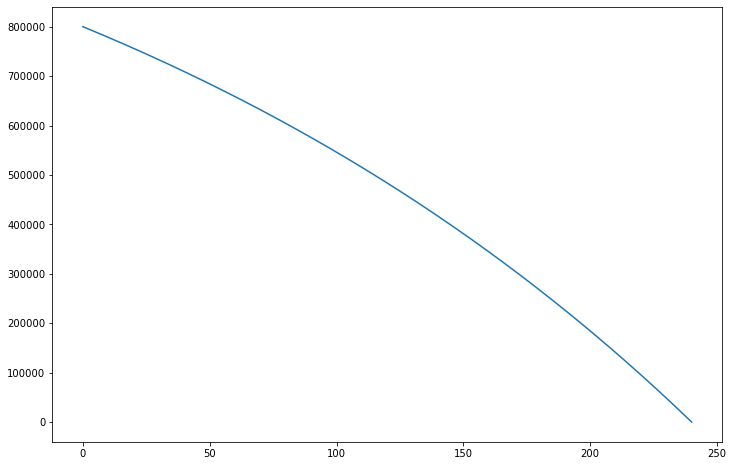

In [21]:
plt.figure(figsize = (12 , 8))
plt.plot(range(240+1), balance)
plt.show()